In [1]:
import numpy as np
import xarray
import matplotlib.pyplot as plt
hfont = {'fontname':'Helvetica'}

In [108]:
def hist_plot(data, description, title):
    fig, ax = plt.subplots(nrows=1, ncols=1)

        # Set Colours:
    fig.set_facecolor('0.33') #grey
    ax.set_facecolor('0.33') #grey
    ax.tick_params(colors = '0.85', labelcolor = '0.85')

        # Axes colours:
    ax.spines['bottom'].set_color('0.85')
    ax.spines['top'].set_color('0.85') 
    ax.spines['right'].set_color('0.85')
    ax.spines['left'].set_color('0.85')
        #Axes limits:
    plt.xlim((-15,50))
    plt.ylim((0,750))

        #Labels & title:
    ax.set_xlabel('Temperature ($^\circ$C)',color = '0.85', fontsize = 13)
    ax.set_ylabel('Number of days',color = '0.85', fontsize = 13)
    ax.set_title(title,color = '0.85', fontsize = 13, pad=10)

        #Bins:
    bins = [-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50]

    bins1 = [-15,-10,-5,0,5,10]
    bins2 = [10,15,20,25,30]
    bins3 = [25,30,35,40,45,50]

    data1 = data.where(data < 10)
    data1 = data1.dropna(dim = 'time')
    data2 = data.where((data > 10) & (data < 30))
    data2 = data2.dropna(dim = 'time')
    data3 = data.where(data >30)
    data3 = data3.dropna(dim = 'time')

    N = len(data1)+len(data2)+len(data3)
    perc1 = str(round(len(data1)/N *100,1)) + '%'
    perc2 = str(round(len(data3)/N *100,1)) + '%'
    
    plt.hist(data1, bins1, edgecolor='#277078', linewidth=1.5, color = '#23656c')
    plt.hist(data3, bins3, edgecolor='#ff7d5d', linewidth=1.5, color = '#eb7457')
    plt.hist(data2, bins2, edgecolor='#89ae95', linewidth=1.5, color = '#789a83')
        #Threshold Lines:
    plt.vlines(30, ymin = 0, ymax = 750, color = '0.85',linestyles='dashed')
    plt.vlines(10, ymin = 0, ymax = 750, color = '0.85',linestyles='dashed')
    
    ax.text(-13, 675, perc1, fontsize = 15, color = '#369da8')
    ax.text(40, 675, perc2, fontsize = 15, color ='#ff7d5d')

    
    
    fig.savefig('plots/'+description + '_hist.png', dpi = 300, facecolor = '0.33', bbox_inches='tight')


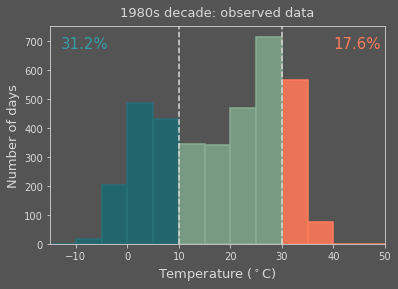

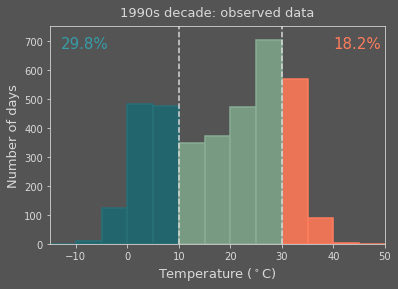

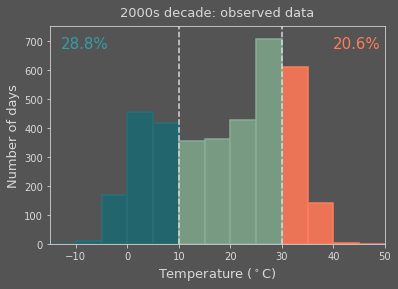

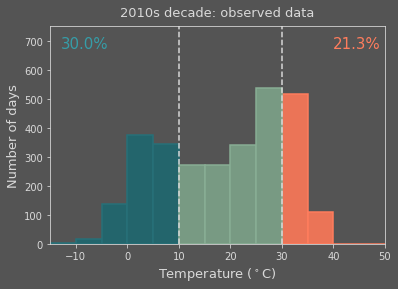

In [111]:
### Plot observed data histograms:

observed_data = xarray.open_dataarray('../risa_preprocessing/data/riskindex/netcdf/max_temperature/Beijing_ERAI.nc')
# divide on decades:
data_1980s=  observed_data.sel(time=slice(*('1980-01-01', '1989-12-31'))) - 273.15
data_1990s=  observed_data.sel(time=slice(*('1990-01-01', '1999-12-31'))) - 273.15
data_2000s=  observed_data.sel(time=slice(*('2000-01-01', '2009-12-31'))) - 273.15
data_2010s=  observed_data.sel(time=slice(*('2010-01-01', '2019-12-31'))) - 273.15

hist_plot(data_1980s, 'obs_1980s', '1980s decade: observed data')
hist_plot(data_1990s, 'obs_1990s', '1990s decade: observed data')
hist_plot(data_2000s, 'obs_2000s', '2000s decade: observed data')
hist_plot(data_2010s, 'obs_2010s', '2010s decade: observed data')


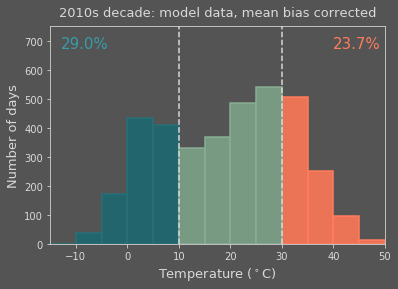

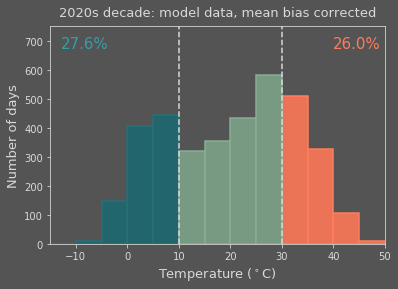

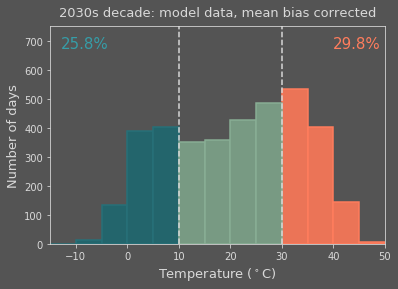

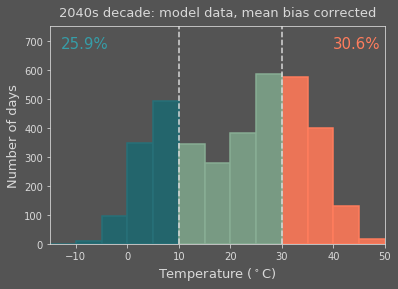

In [112]:
# open model_data files & convert to Celsius:
model_10s = xarray.open_dataarray('Beijing_rcp45_MEAN_bias_corr_10s.nc') -273.15
model_20s = xarray.open_dataarray('Beijing_rcp45_MEAN_bias_corr_20s.nc') -273.15
model_30s = xarray.open_dataarray('Beijing_rcp45_MEAN_bias_corr_30s.nc') -273.15
model_40s = xarray.open_dataarray('Beijing_rcp45_MEAN_bias_corr_40s.nc') -273.15

hist_plot(model_10s, 'model_2010s', '2010s decade: model data, mean bias corrected')
hist_plot(model_20s, 'model_2020s', '2020s decade: model data, mean bias corrected')
hist_plot(model_30s, 'model_2030s', '2030s decade: model data, mean bias corrected')
hist_plot(model_40s, 'model_2040s', '2040s decade: model data, mean bias corrected')